<hr/>

# Introduction to Data Science - Fall 2021
**Jinchao Feng and Christian Kuemmerle** - introdsfall2021@jh.edu <br/>

- Sampling from distributions
- Density estimation

<hr/>


<h1><font color="darkblue">Samples, PDFs in 1- and 2-D</font></h1>



### Descriptive Statistics
- Characterization of location, dispersion, etc.

| | Sample Estimates <font color="white">(notations)</font> | Probabilisty Density Functions   |
|--|--------------|-------------|
| **Average** | $\displaystyle\ \bar{x}=\frac{1}{N}\sum_{i=1}^N x_i = \big\langle x_i \big\rangle_{i=1}^N$ | $\displaystyle\ \mu = \mathbb{E}[X] =\!\int\!x\,p(x)\,dx$| 
| **Variance** | $\displaystyle\ s^2=\frac{1}{N\!-\!1}\sum_{i=1}^N \big(x_i\!-\!\bar{x}\big)^2 $|  $\displaystyle\ \mathbb{Var}[X] =\!\int\!(x\!-\!\mu)^2 p(x)\,dx$| 

- Useful connection to sampling

### Sampling from distributions

- Uniform on [0,1): Pseudorandomness

In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [11]:
# generate some random numbers
np.random.random(3)

array([0.56804456, 0.92559664, 0.07103606])

In [13]:
# seed random number generator
np.random.seed(0)
np.random.random(3)

array([0.5488135 , 0.71518937, 0.60276338])

- Uniform between $a$ and $b$: scale and shift （均匀概率分布）


>$\displaystyle U_{ab} = a + (b\!-\!a)\,U_{01} $

- Inverse transform sampling in $\mathbb{R}$

>$\displaystyle X = \mathrm{CDF}^{-1}(U_{01}) $
><br/>
> Unhomework: prove it!

<img src="files/inv.png" height="400" width="400" align=left>

>1. the ability to calculate the indefinite integral of the required distribution.
><br/>
>2. the ability to calculate the inverse

> Example: $\displaystyle f(x) = \frac{1}{\lambda} e^{-\frac{x}{\lambda}},\ x\geq0,\ \lambda>0 $
> * $\displaystyle F(x) = 1 - e^{-\frac{x}{\lambda}}$
><br/>
> * $\displaystyle F^{-1}(u) = -\lambda\log(1-u)$

In [14]:
from scipy.stats import uniform
from scipy.stats import expon

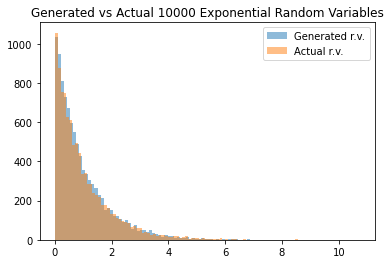

In [15]:
# generate sample with size N
mu, N = 1, 10000
U = uniform.rvs(size=N)
# compute the inverse
X = -mu*np.log(1-U)
actual = expon.rvs(size=N,scale=mu)

# compare the samples from inverse transfomation with actual sampling
plt.figure(figsize=(6,4))
plt.hist(X, bins=100, alpha=0.5, label="Generated r.v.")
plt.hist(actual, bins=100, alpha=0.5, label="Actual r.v.")
plt.title("Generated vs Actual %i Exponential Random Variables" %N)
plt.legend()
plt.show()

- Rejection sampling - also works in $\mathbb{R}^N$
> * $\displaystyle p(x) = \frac{1}{Z_p}\tilde{p}(x)$
><br/>
> where $\tilde{p}(z)$ can readily be evaluated, but $Z_P$ is unknown

<img src="files/rejection_sampling.png" width="600" align=left>

<img src="files/anim.gif" align=left>
<!--<img src="http://dl.dropbox.com/u/27415200/anim.gif">-->


### Numerical Methods
If the $\left\{x_i\right\}$ set is sampled from the probability density function $p(\cdot)$,
the following will be true:
- Average

>$\displaystyle\mathbb{E}[X] =\!\int x\ p(x)\,dx  \ \approx\ \frac{1}{N}\sum_i x_i $

- Variance

>$\displaystyle\mathbb{E}[(X\!-\!\mu)^2]=\int (x\!-\!\mu)^2\ p(x)\,dx \approx \frac{1}{N}\sum_i (x_i\!-\!\mu)^2$
><br/><br/>
> compare to
><br/><br/>
>$\displaystyle\ s^2=\frac{1}{N\!-\!1}\sum_{i=1}^N \big(x_i\!-\!\bar{x}\big)^2 $
><br/><br/>
> Bessel correction: $N\!-\!1$ independent $(x_i\!-\!\bar{x})$ differences
<br/><br/>
>$\displaystyle \sum_{i=1}^N (x_i\!-\!\bar{x}) =\ ???  (ansewr: 0)$ <font color="white">.... 0 ...</font>


In [16]:
from scipy.stats import norm as gaussian

In [17]:
# generate sample with size N
mu, sigma, N = 0, 1, 5
x = gaussian.rvs(mu, sigma, N)

avg = np.mean(x)
print (avg)

# variance estimates
s2   = np.sum( (x-avg)**2 ) /(N-1)  # correct
s2n  = np.sum( (x-avg)**2 ) / N     # biased 
s2k  = np.sum( (x- mu)**2 ) / N     # known mean
# standard deviation estimates
sqrt(s2), sqrt(s2n), sqrt(s2k) 

0.3178982525682724


(0.28668687091807943, 0.25642053265181325, 0.4084247648605564)

(5, 10000) (10000,)
(10000,)
0.9369631689455779 0.8380453352703727 0.9465998328845479


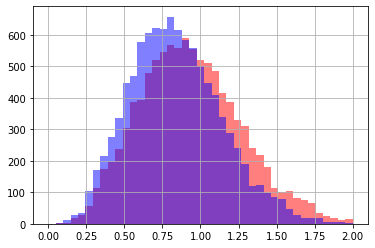

In [8]:
# generate M runs with N samples each
mu, sigma, N, M = 0, 1, 5, 10000
X = gaussian.rvs(loc=mu, scale=sigma, size=(N,M))
avg = np.mean(X, axis=0)
print (X.shape, avg.shape)

# variance estimates - check out broadcasting in X-avg
s2   = np.sum( (X-avg)**2, axis=0) /(N-1) # correct
s2n  = np.sum( (X-avg)**2, axis=0) / N    # biased
s2k  = np.sum( (X- mu)**2, axis=0) / N    # known mean

print (s2.shape)

# standard deviation estimates
s, sn, sk = np.sqrt(s2), np.sqrt(s2n), np.sqrt(s2k)
print (mean(s), mean(sn), mean(sk))

hist(s , 41, range=[0,2], color='r', alpha=0.5);
hist(sn, 41, range=[0,2], color='b', alpha=0.5);
grid()

### Detour: broadcasting

In [18]:
# arrays of the same size, element-by-element 
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [19]:
# add a scalar to a one-dimensional array
a + 5

array([5, 6, 7])

In [23]:
# add a one-dimensional array to a two-dimensional array
M = np.ones((3, 3)) # matrix with ones
print(M)
print(M + a)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


### Density Estimation
- Histograms
    - Width of bins, $h$
    - Start of bin boundary, $x_0$

 >$\displaystyle \mathrm{Hist}(x) = \frac{1}{N}\sum_i \pmb{1}_{\mathrm{bin}(x_i;x_0,h)}(x)$
        
- Kernel Density Estimation (KDE)
    - Bandwidth $h$
   
 >$\displaystyle \mathrm{KDE}(x) = \frac{1}{N}\sum_i K_h(x\!-\!x_i) = \frac{1}{Nh}\sum_i K\left(\frac{x\!-\!x_i}{h}\right)$
   
    - Can use different $K(\cdot)$ kernel functions
        - E.g., Uniform, Triangular, Gauss, Epanechnikov

See animations at
http://www.mglerner.com/blog/?p=28


### Kernel Function
- Finite vs Infinite support
- Numerical evaluations
- Frequently used kernels

<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Kernels.svg" alt="All of the above kernels in a common coordinate system"  width="350" align=left>


Learn more about KDE 
[here](https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/) and also check out Bayesian Blocks 
[here](https://jakevdp.github.io/blog/2012/09/12/dynamic-programming-in-python/)
<br>
&mdash; tutorials by Jake Vanderplas

### Detour: Dirac delta

- In the limit of $h\rightarrow{}0$, the kernel will become strange:

<img src="files/488px-Dirac_distribution_PDF.svg.png" align=right width=250>

> **Dirac's $\delta$** "function" is 0 everywhere except at 0 such that
<br/>
> $\displaystyle \int \delta(x)\,dx = 1$

- Interesting properties, e.g., 

> $\displaystyle \int f(x)\,\delta(x\!-\!a)\,dx = f(a)$

-  See **distribution theory** and **functionals** for more background

### An interesting result 

- Bad density estimation but if...

> $\displaystyle p(x) = \frac{1}{N} \sum_{i=1}^N \delta(x\!-\!x_i)$

- The expectation value

> $\displaystyle \mathbb{E}[X] =  \int x\, \frac{1}{N} \sum_{i=1}^N  \delta(x\!-\!x_i) \,dx$
> <br/><br/>
> $\displaystyle \mathbb{E}[X] = \frac{1}{N} \sum_{i=1}^N \int x\, \delta(x\!-\!x_i) \,dx$
><br/><br/>
> $\displaystyle \mathbb{E}[X] = \frac{1}{N} \sum_{i=1}^N x_i$



### Unhomework

1. Sample from a mixture of two Gaussians using uniform random numbers in the [0,1) interval. Try different $(\mu_1, \sigma_1)$ and $(\mu_2,\sigma_2$) values and different $w_1$ and $w_2$ weights!
1. Build different density estimators and compare to the original PDF. Try histogramming and KDE with different parameters.